<a href="https://colab.research.google.com/github/arvind-maurya/IIML_Group_Project/blob/main/Predicting_flight_delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Name:

Project Team Members:


The goal of this project is to develop a model aimed at predicting flight delays at take-off. We will try and test various model to arrive the best possible results.

From a technical point of view, the main aspects of python covered throughout the notebook are:

**visualization:** matplolib, seaborn, basemap

**data manipulation:** pandas, numpy

**modeling:** sklearn, scipy

**class definition:** regression, figures



---


**Overview of the Dataset**


---



In [2]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:

#import the flight dataset
import pandas as pd #the pandas library is useful for data processing

#Read CSV file from drive. Drive is used because size of the dataset is large
#You need to mound the drive before running this code. Everytime you need to mount the drive before running the code.
flights_df = pd.read_csv('/content/drive/MyDrive/flight_dataset/flights.csv', low_memory=False)

#df.shape give the dimension of dataset (rows x column)
print('Dataframe dimensions:', flights_df.shape)

Dataframe dimensions: (5819079, 31)


In [13]:
#Lets look at the top 10 rows in dataset
flights_df.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Descriptive statistics for the data frame.More details in the link below
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

flights_df.describe(include='all')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5819079,5.819079e+06,5804358,5819079,5819079,5.819079e+06,...,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,89884,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
unique,NaN,NaN,NaN,NaN,14,NaN,4897,628,629,NaN,...,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,WN,NaN,N480HA,ATL,ATL,NaN,...,NaN,NaN,NaN,NaN,B,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1261855,NaN,3768,346836,346904,NaN,...,NaN,NaN,NaN,NaN,48851,NaN,NaN,NaN,NaN,NaN
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,NaN,2.173093e+03,NaN,NaN,NaN,1.329602e+03,...,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,NaN,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,NaN,1.757064e+03,NaN,NaN,NaN,4.837518e+02,...,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,NaN,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,NaN,NaN,1.000000e+00,...,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,NaN,7.300000e+02,NaN,NaN,NaN,9.170000e+02,...,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,NaN,1.690000e+03,NaN,NaN,NaN,1.325000e+03,...,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,NaN,3.230000e+03,NaN,NaN,NaN,1.730000e+03,...,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,NaN,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00


In [15]:
#Print the data types of each column in data set.
flights_df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [17]:
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(flights_df.dtypes).T.rename(index={0:'column type'})

tab_info=tab_info.append(pd.DataFrame(flights_df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(flights_df.isnull().sum()/flights_df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

<ipython-input-17-ae26dfece928>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info=tab_info.append(pd.DataFrame(flights_df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
<ipython-input-17-ae26dfece928>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tab_info=tab_info.append(pd.DataFrame(flights_df.isnull().sum()/flights_df.shape[0]*100)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
column type,int64,int64,int64,int64,object,int64,object,object,object,int64,...,float64,float64,int64,int64,object,float64,float64,float64,float64,float64
null values (nb),0,0,0,0,0,0,14721,0,0,0,...,92513,105071,0,0,5729195,4755640,4755640,4755640,4755640,4755640
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.252978,0.0,0.0,0.0,...,1.589822,1.805629,0.0,0.0,98.455357,81.72496,81.72496,81.72496,81.72496,81.72496


Each entry of the flights.csv file corresponds to a flight and we see that more than 5'800'000 flights have been recorded in 2015. These flights are described according to 31 variables. A description of these variables can be found here and I briefly recall the meaning of the variables that will be used in this notebook:

**YEAR, MONTH, DAY, DAY_OF_WEEK:** dates of the flight

**AIRLINE:** An identification number assigned by US DOT to identify a unique airline

**ORIGIN_AIRPORT and DESTINATION_AIRPORT:** code attributed by IATA to identify the airports

**SCHEDULED_DEPARTURE and SCHEDULED_ARRIVAL :** scheduled times of take-off and landing

**DEPARTURE_TIME and ARRIVAL_TIME:** real times at which take-off and landing took place

**DEPARTURE_DELAY and ARRIVAL_DELAY:** difference (in minutes) between planned and real times

**DISTANCE:** distance (in miles)

An additional file of this dataset, the airports.csv file, gives a more exhaustive description of the airports:

In [27]:
airports_df = pd.read_csv("/content/drive/MyDrive/flight_dataset/airports.csv")


In [28]:
airports_df.describe(include='all')

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
count,322,322,322,322,322,319.000000,319.000000
unique,322,322,308,54,1,NaN,NaN
top,ABE,Lehigh Valley International Airport,Jackson,TX,USA,NaN,NaN
freq,1,1,2,24,322,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,38.981244,-98.378964
std,NaN,NaN,NaN,NaN,NaN,8.616736,21.523492
min,NaN,NaN,NaN,NaN,NaN,13.483450,-176.646030
25%,NaN,NaN,NaN,NaN,NaN,33.652040,-110.839385
50%,NaN,NaN,NaN,NaN,NaN,39.297610,-93.403070
75%,NaN,NaN,NaN,NaN,NaN,43.154675,-82.722995


To have a global overview of the geographical area covered in this dataset, we can plot the airports location and indicate the number of flights recorded during year 2015 in each of them:

In [29]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.3 MB/s eta 0:00:00


In [69]:
!pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21048 sha256=f557efb480dc3bbc9665a127c98fbac0ad9b1cd498529afff9001b349d2c0a15
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [57]:
count_flights = flights_df['ORIGIN_AIRPORT'].value_counts()
count_flights

ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
13541        11
10165         9
14222         9
13502         6
11503         4
Name: ORIGIN_AIRPORT, Length: 628, dtype: int64

labels: ['1 <.< 100', '100 <.< 1000', '1000 <.< 10000', '10000 <.< 100000', '100000 <.< 1000000']


<Figure size 1100x1100 with 0 Axes>

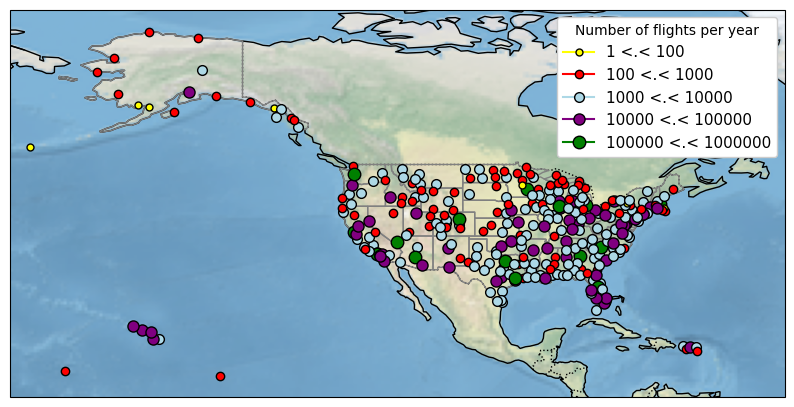

In [70]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
from collections import OrderedDict

count_flights = flights_df['ORIGIN_AIRPORT'].value_counts()

plt.figure(figsize=(11, 11))

# Define properties of markers and labels
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]

labels = []
for i in range(len(size_limits) - 1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i + 1]))

print("labels:", labels)

# Create a cartopy map
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, -50, 10, 75], ccrs.PlateCarree())

ax.stock_img()
ax.coastlines()
ax.add_feature(ccrs.cartopy.feature.LAND )
ax.add_feature(ccrs.cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(ccrs.cartopy.feature.STATES, linestyle='-',edgecolor='gray')


# Plot airport markers
for index, (code, y, x) in airports_df[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    ind = isize[-1]
    ax.plot(x, y, marker='o', markersize=ind + 5, markeredgewidth=1, color=colors[ind],
             markeredgecolor='k', label=labels[ind])


# Create a legend
handles, labels = ax.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
ax.legend(new_label.values(), new_label.keys(), loc='upper right', prop={'size': 11},
          title='Number of flights per year', frameon=True, framealpha=1)



plt.show()

import plotly.express as px

# Create an interactive map using Plotly
fig = px.scatter_geo(airports_df, lat='LATITUDE', lon='LONGITUDE', text='ORIGIN_AIRPORT',
                     size='FLIGHT_COUNT', color='FLIGHT_COUNT',
                     color_continuous_scale='Viridis',
                     hover_name='ORIGIN_AIRPORT', projection='natural earth',
                     title='Flight Counts by Airport')
fig.update_geos(showcoastlines=True, coastlinecolor='black', showland=True, landcolor='white')

# Show the interactive map
fig.show()
